In [91]:
# import all basic modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from settings import ipynb_settings
ipynb_settings()

In [92]:
data = pd.read_csv(r"C:\Users\Varshil\Downloads\Regression-Yes-Bank-Stock-Closing-Price-Prediction-main\Regression-Yes-Bank-Stock-Closing-Price-Prediction-main\Data_Files\YESBANK.csv")

In [93]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.0000,14.0000,11.2500,12.4600
1,Aug-05,12.5800,14.8800,12.5500,13.4200
2,Sep-05,13.4800,14.8700,12.2700,13.3000
3,Oct-05,13.2000,14.4700,12.4000,12.9900
4,Nov-05,13.3500,13.8800,12.8800,13.4100


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### **NO NULL VALUES. 5 FEATURES AND 185 ROWS**

In [95]:
df = data.copy()

In [96]:
df['Month'] = df.Date.apply(lambda x : x.split('-')[0].strip())
df['Year'] = df.Date.apply(lambda x : int('20' + x.split('-')[1].strip()))

In [97]:
df['Date'] = pd.to_datetime(df.Date, format = r"%b-%y")

##### We have highest and lowest price of stocks for each month. I can create a feature that shows range of variation for each month. That can be derived from subtraction of 'Low' feature from 'High'. That difference is the difference between highest and lowest price of YESBANK stock for corresponding month.

In [98]:
df['range_of_var'] = df.apply(lambda x : x['High'] - x['Low'], axis = 1)

##### We also have opening and closing price for stocks. Thus we can get the profit or the loss for stock prices.

In [99]:
df['profit_loss'] = df.apply(lambda x : x['Close'] - x['Open'], axis = 1)

In [100]:
df['profit'] = df.profit_loss.apply(lambda x : 1 if x > 0 else 0)

In [101]:
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['month_num'] = df.Month.apply(lambda x : month_order[x])

In [102]:
for x in df.columns[1:5]:
    print('For ' + x + ' Price')
    print(f'Highest Price : {df[x].max()}')
    print(f'Lowest Price : {df[x].min()}')
    print()

For Open Price
Highest Price : 369.95
Lowest Price : 10.0

For High Price
Highest Price : 404.0
Lowest Price : 11.24

For Low Price
Highest Price : 345.5
Lowest Price : 5.55

For Close Price
Highest Price : 367.9
Lowest Price : 9.98



#### **EDA**

In [103]:
title_dict = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 20}
label_dict = {'family': 'sans serif', 'color':  'darkred', 'weight': 'bold', 'size': 16}

#### **We have right skewed distribution for all features. That means for most of the instances in dataset the stock prices attains the value in range 0 - 100.**

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'range_of_var'}>,
        <AxesSubplot:title={'center':'profit_loss'}>,
        <AxesSubplot:title={'center':'profit'}>],
       [<AxesSubplot:title={'center':'month_num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

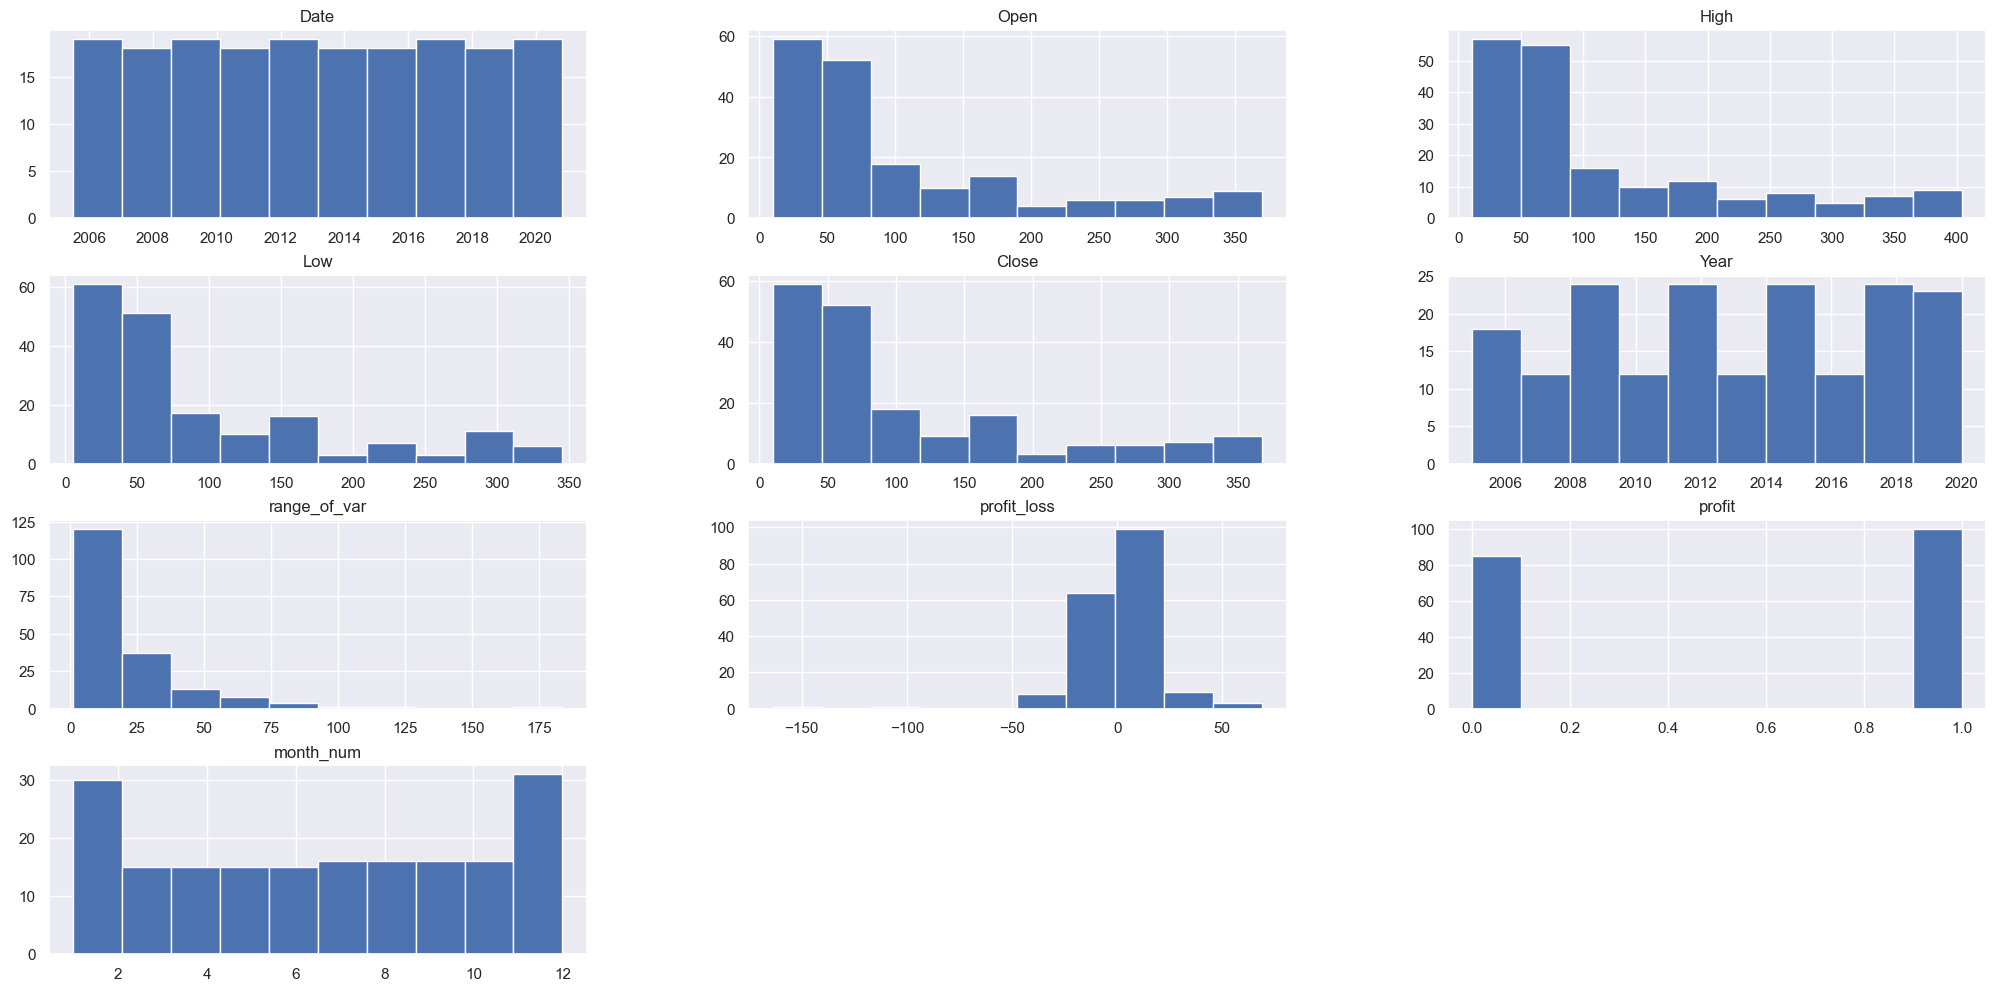

In [104]:
df.hist()

#### **The stock price is increased with time but in 2019 there is a sudden fall in prices that might be due to Covid-19 pandemic. In 2020 it continues to fall and reaches minimum price again.**

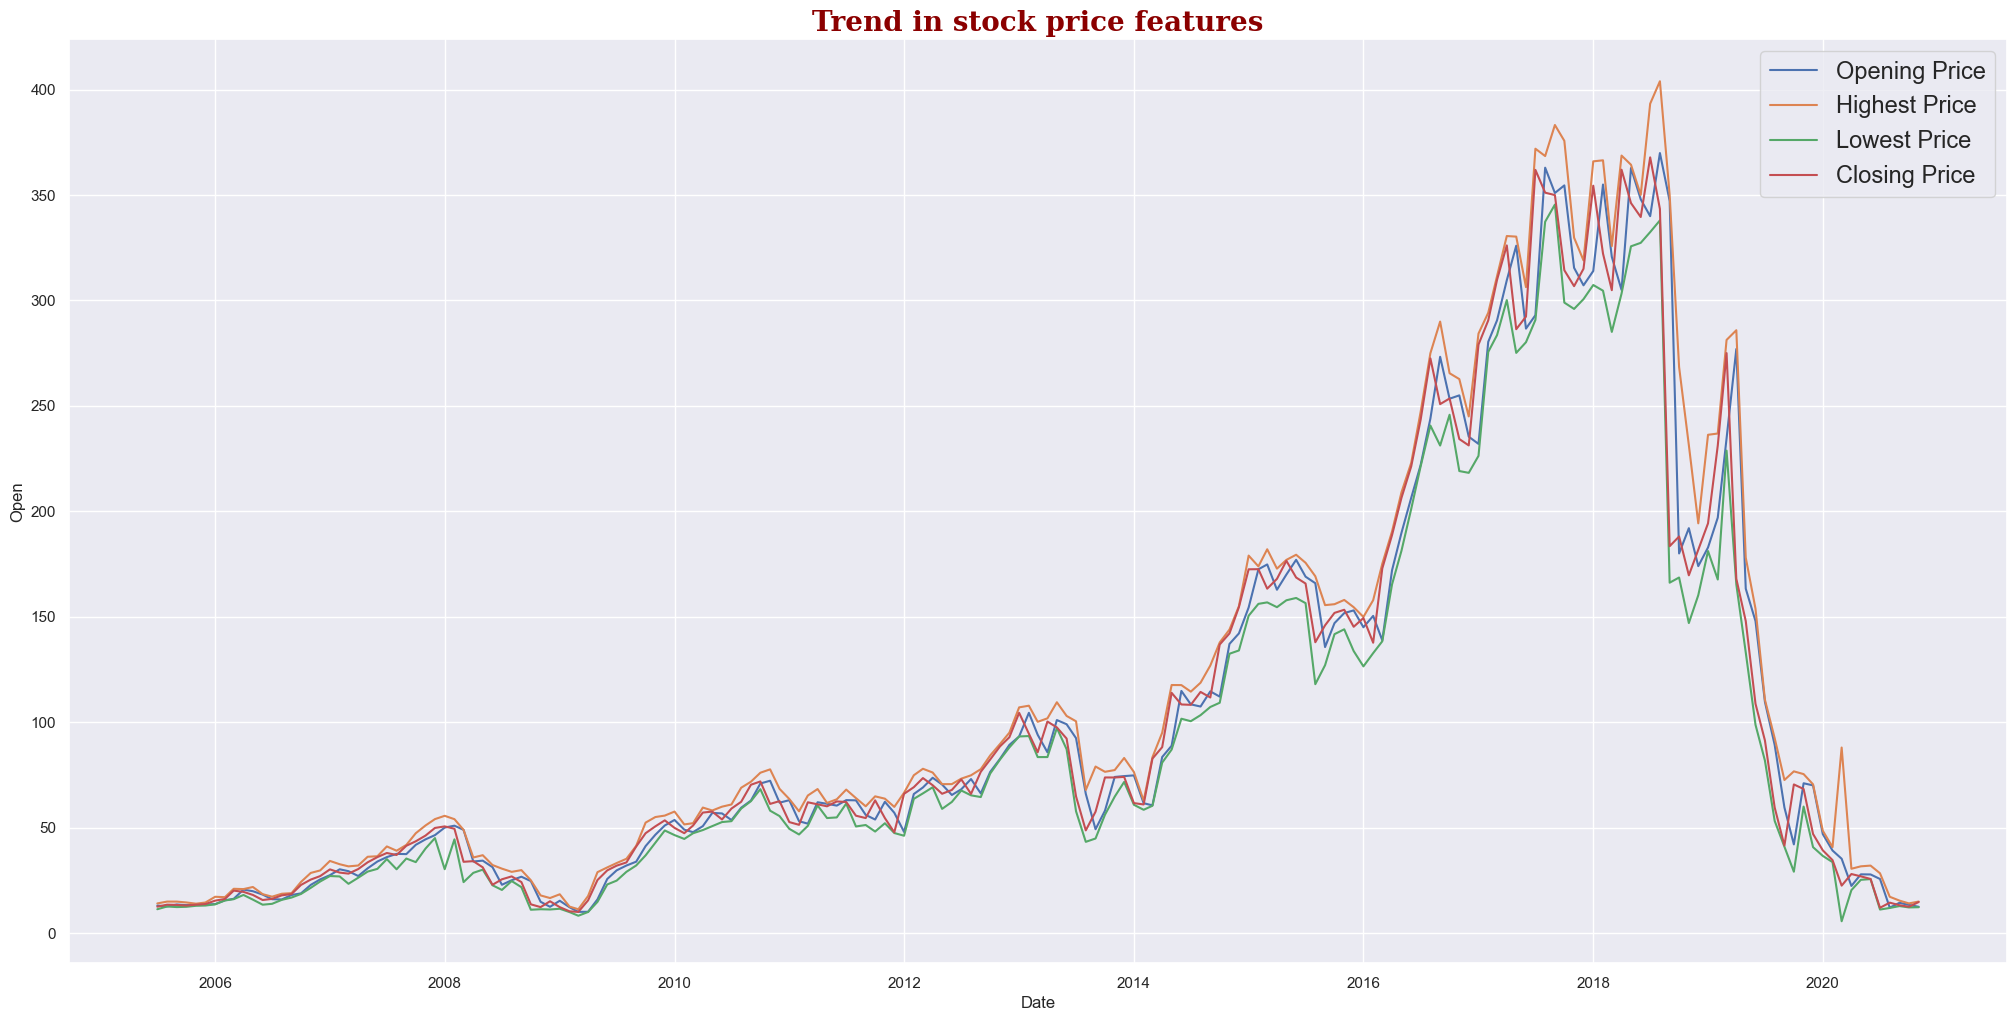

In [105]:
sns.lineplot(x = df.Date, y = df.Open)
sns.lineplot(x = df.Date, y = df.High)
sns.lineplot(x = df.Date, y = df.Low)
sns.lineplot(x = df.Date, y = df.Close)
plt.legend(['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price'], fontsize = 17)
plt.title("Trend in stock price features", fontdict = title_dict)
plt.show()

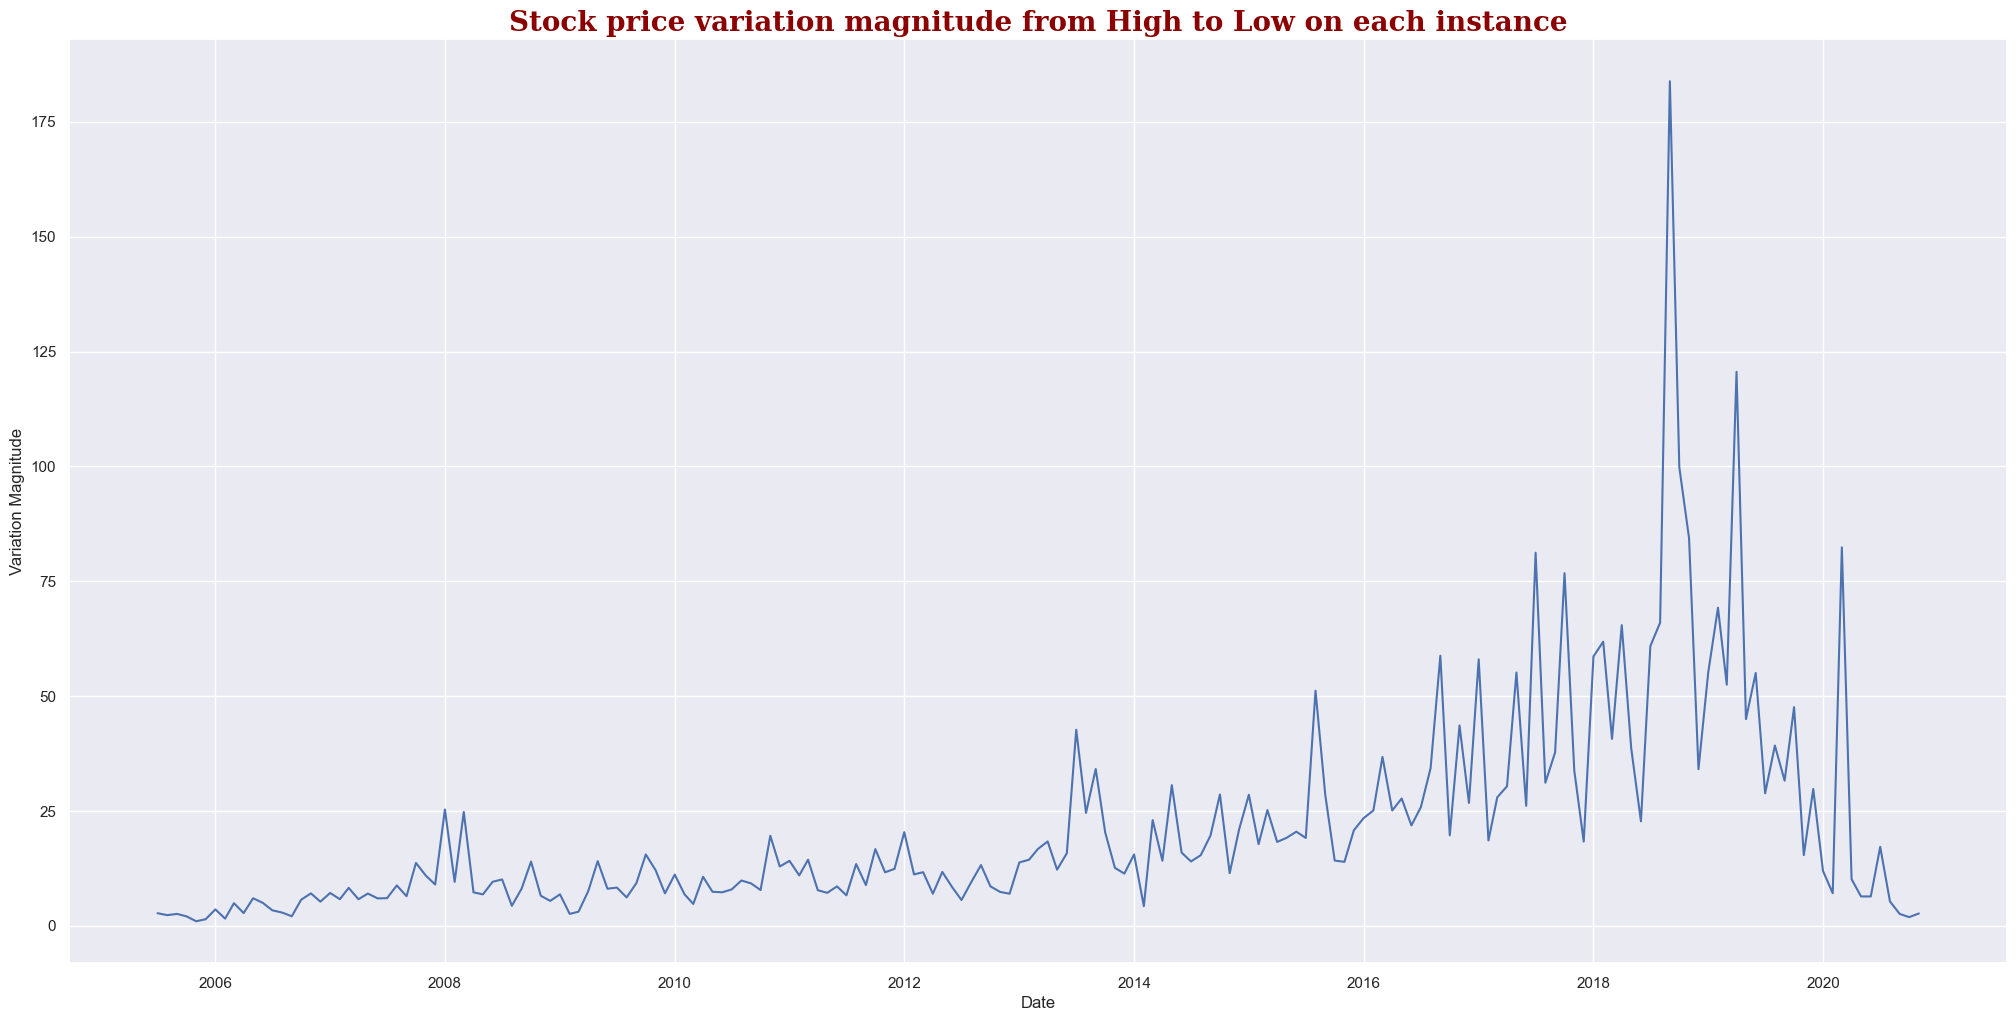

In [106]:
sns.lineplot(x = df.Date, y = df.range_of_var)
plt.title("Stock price variation magnitude from High to Low on each instance", fontdict = title_dict)
plt.ylabel("Variation Magnitude")
plt.show()

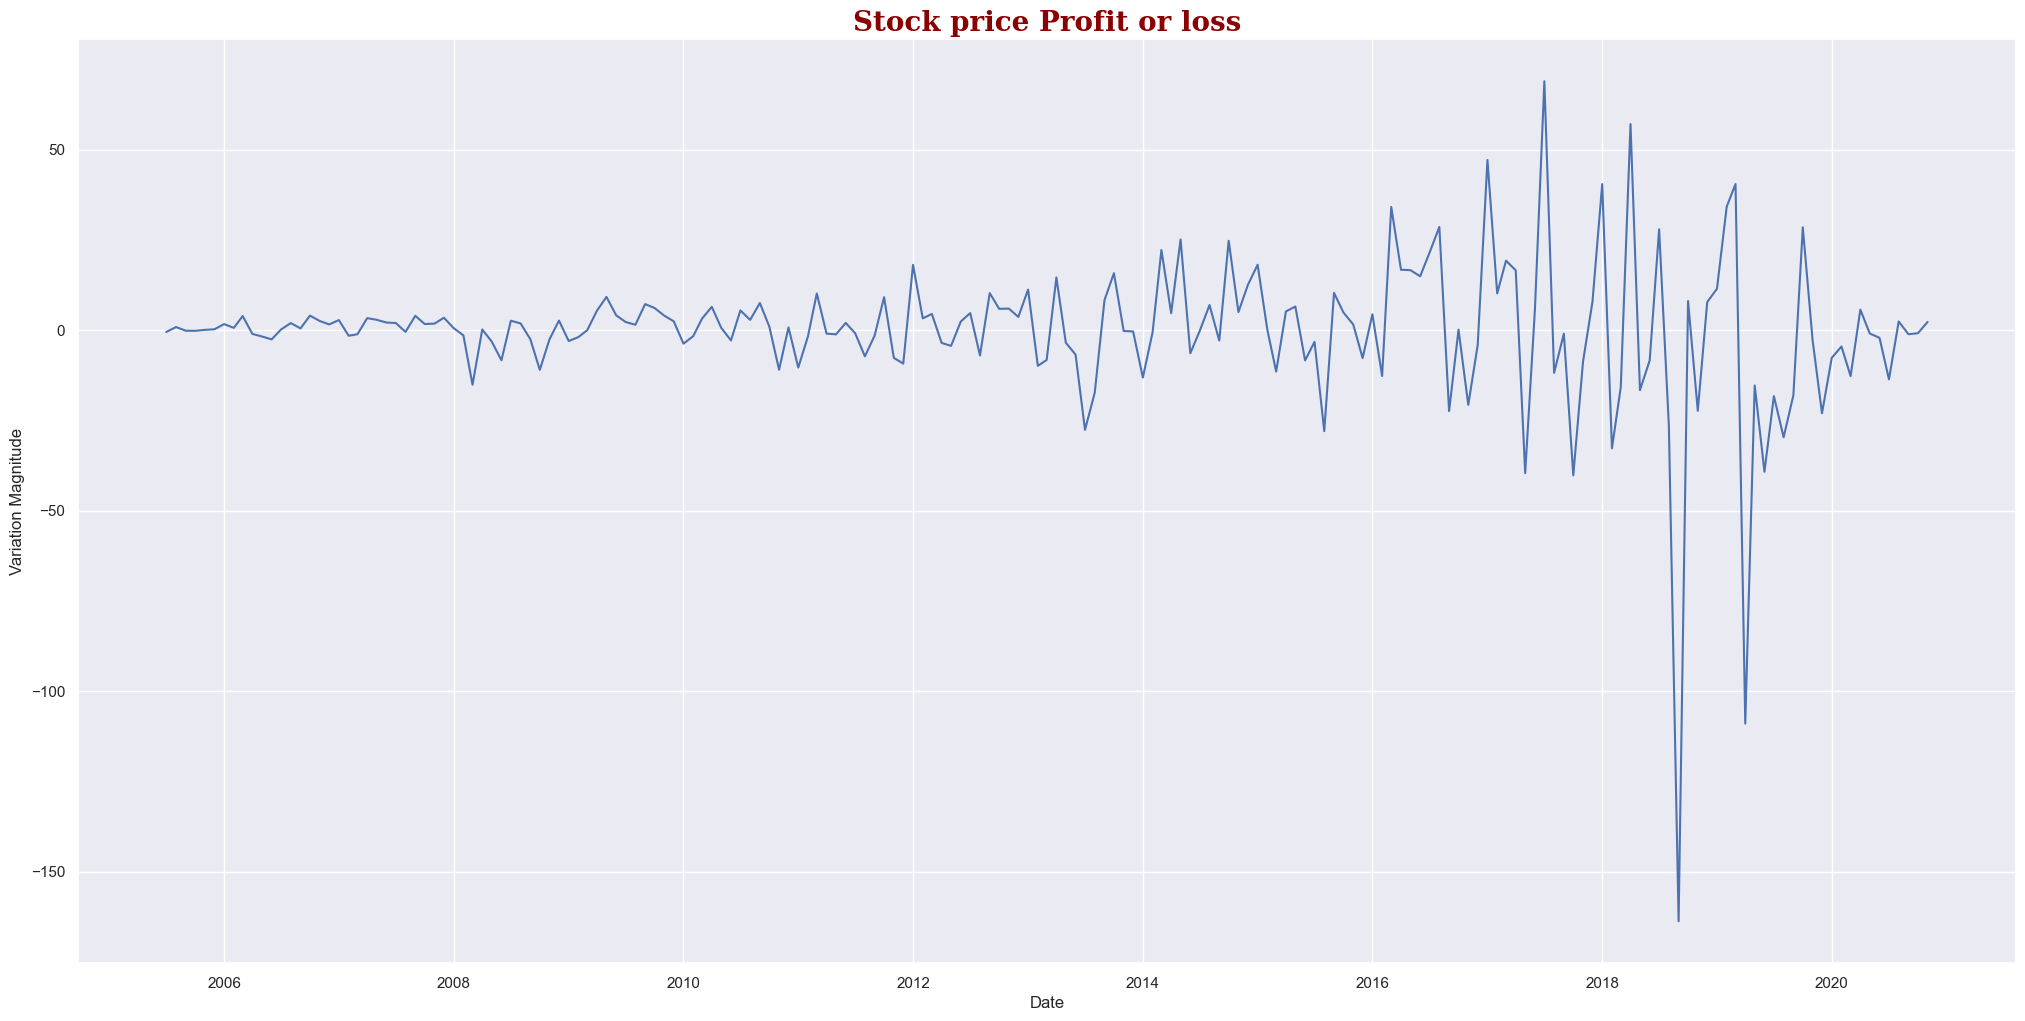

In [55]:
sns.lineplot(x = df.Date, y = df.profit_loss)
plt.title("Stock price Profit or loss", fontdict = title_dict)
plt.ylabel("Variation Magnitude")
plt.show()

C:\Users\Varshil\AppData\Local\Temp\ipykernel_8608\2957917769.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Sum of prices in each month",  fontsize = 30, weight = 'bold', Color = 'darkred')


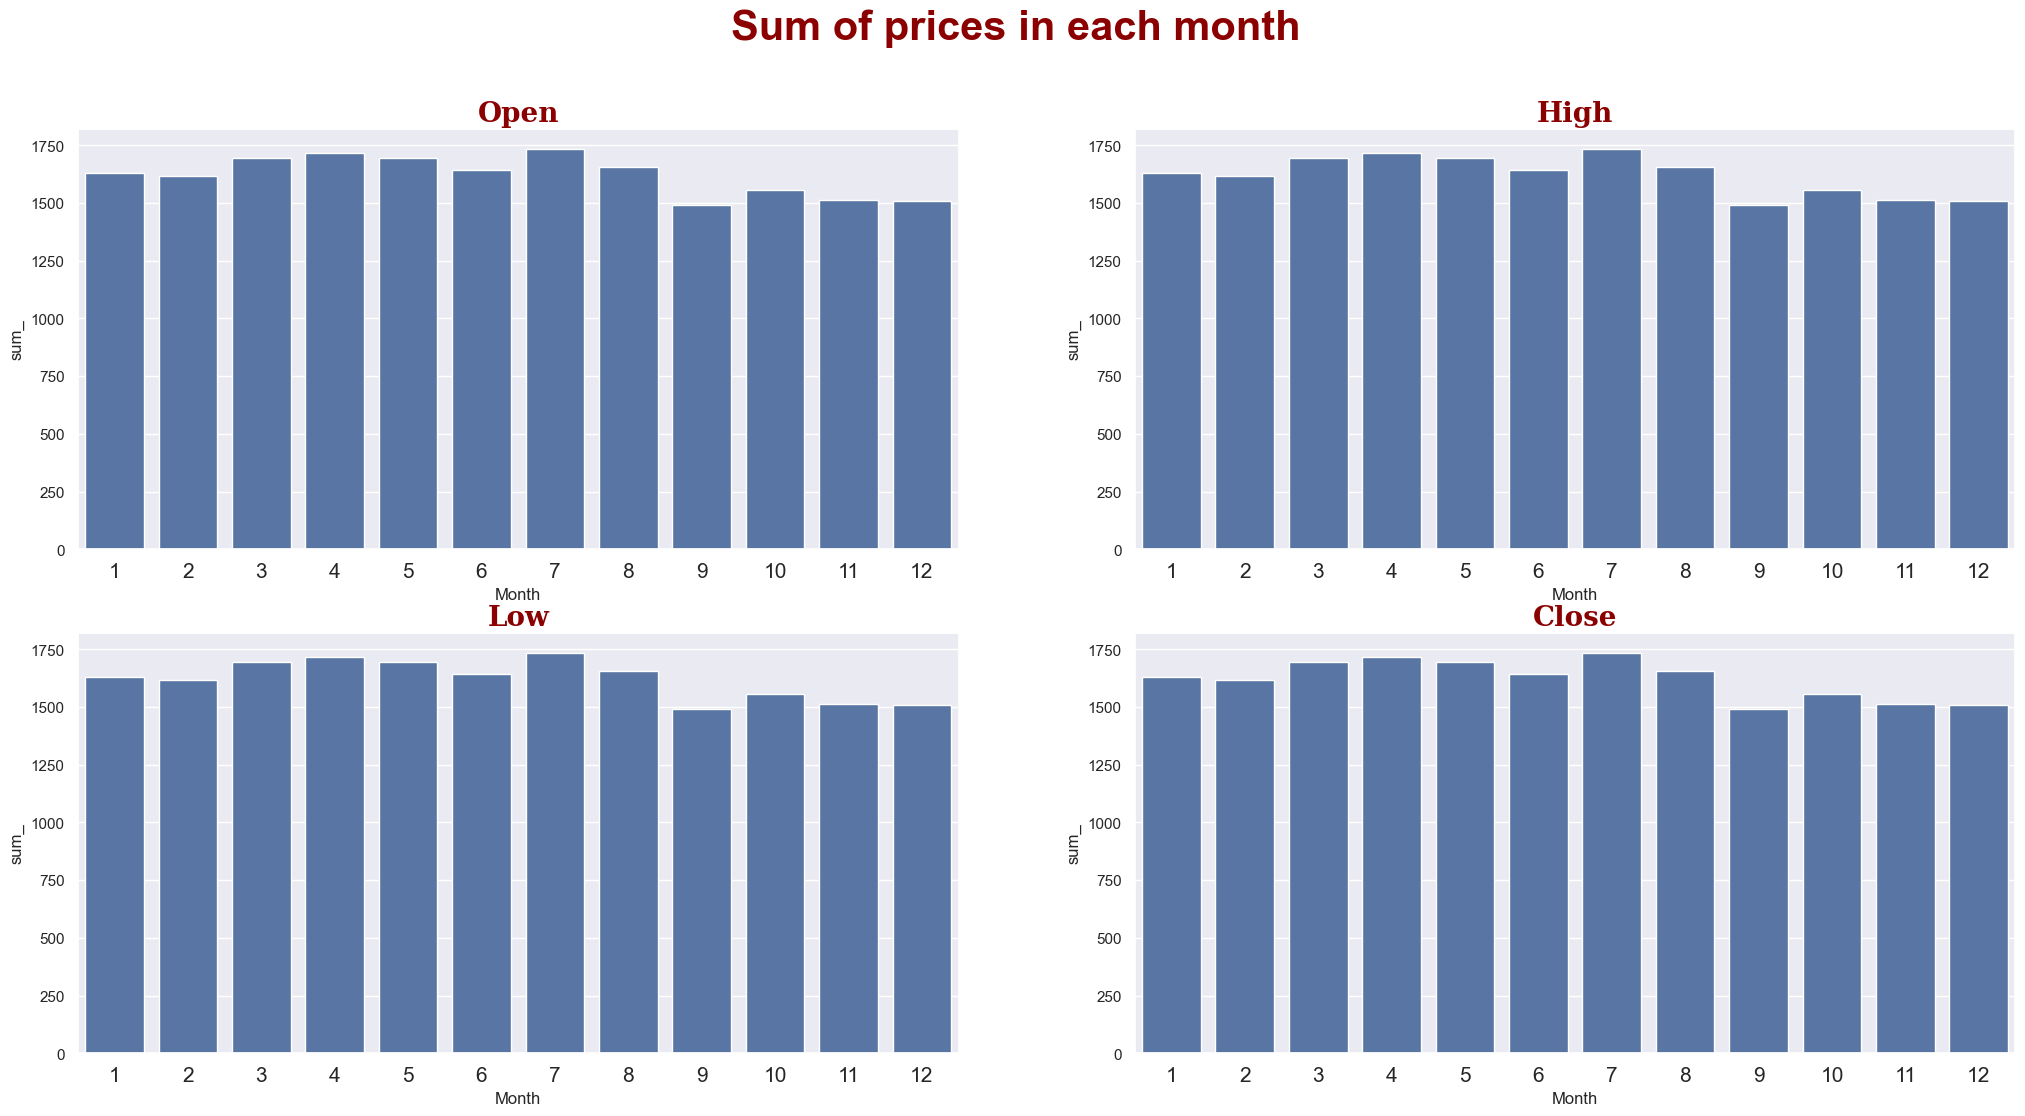

In [109]:
j = 1
# will use this dictionary to sort the months in month order
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

for col in df.columns[1:5]:
    aux = df.groupby('Month')[x].sum().reset_index(name = 'sum_')
    aux['Month'] = aux.Month.apply(lambda x : month_order[x])
    aux.sort_values('Month', inplace = True)
    plt.subplot(220+j)
    sns.barplot(x = aux.Month, y = aux.sum_)
    plt.xticks(fontsize = 15)
    plt.title(col, fontdict= title_dict)
    j+=1

plt.suptitle("Sum of prices in each month",  fontsize = 30, weight = 'bold', Color = 'darkred')
plt.show()

C:\Users\Varshil\AppData\Local\Temp\ipykernel_8608\2057548856.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Sum of prices in each month",  fontsize = 30, weight = 'bold', Color = 'darkred')


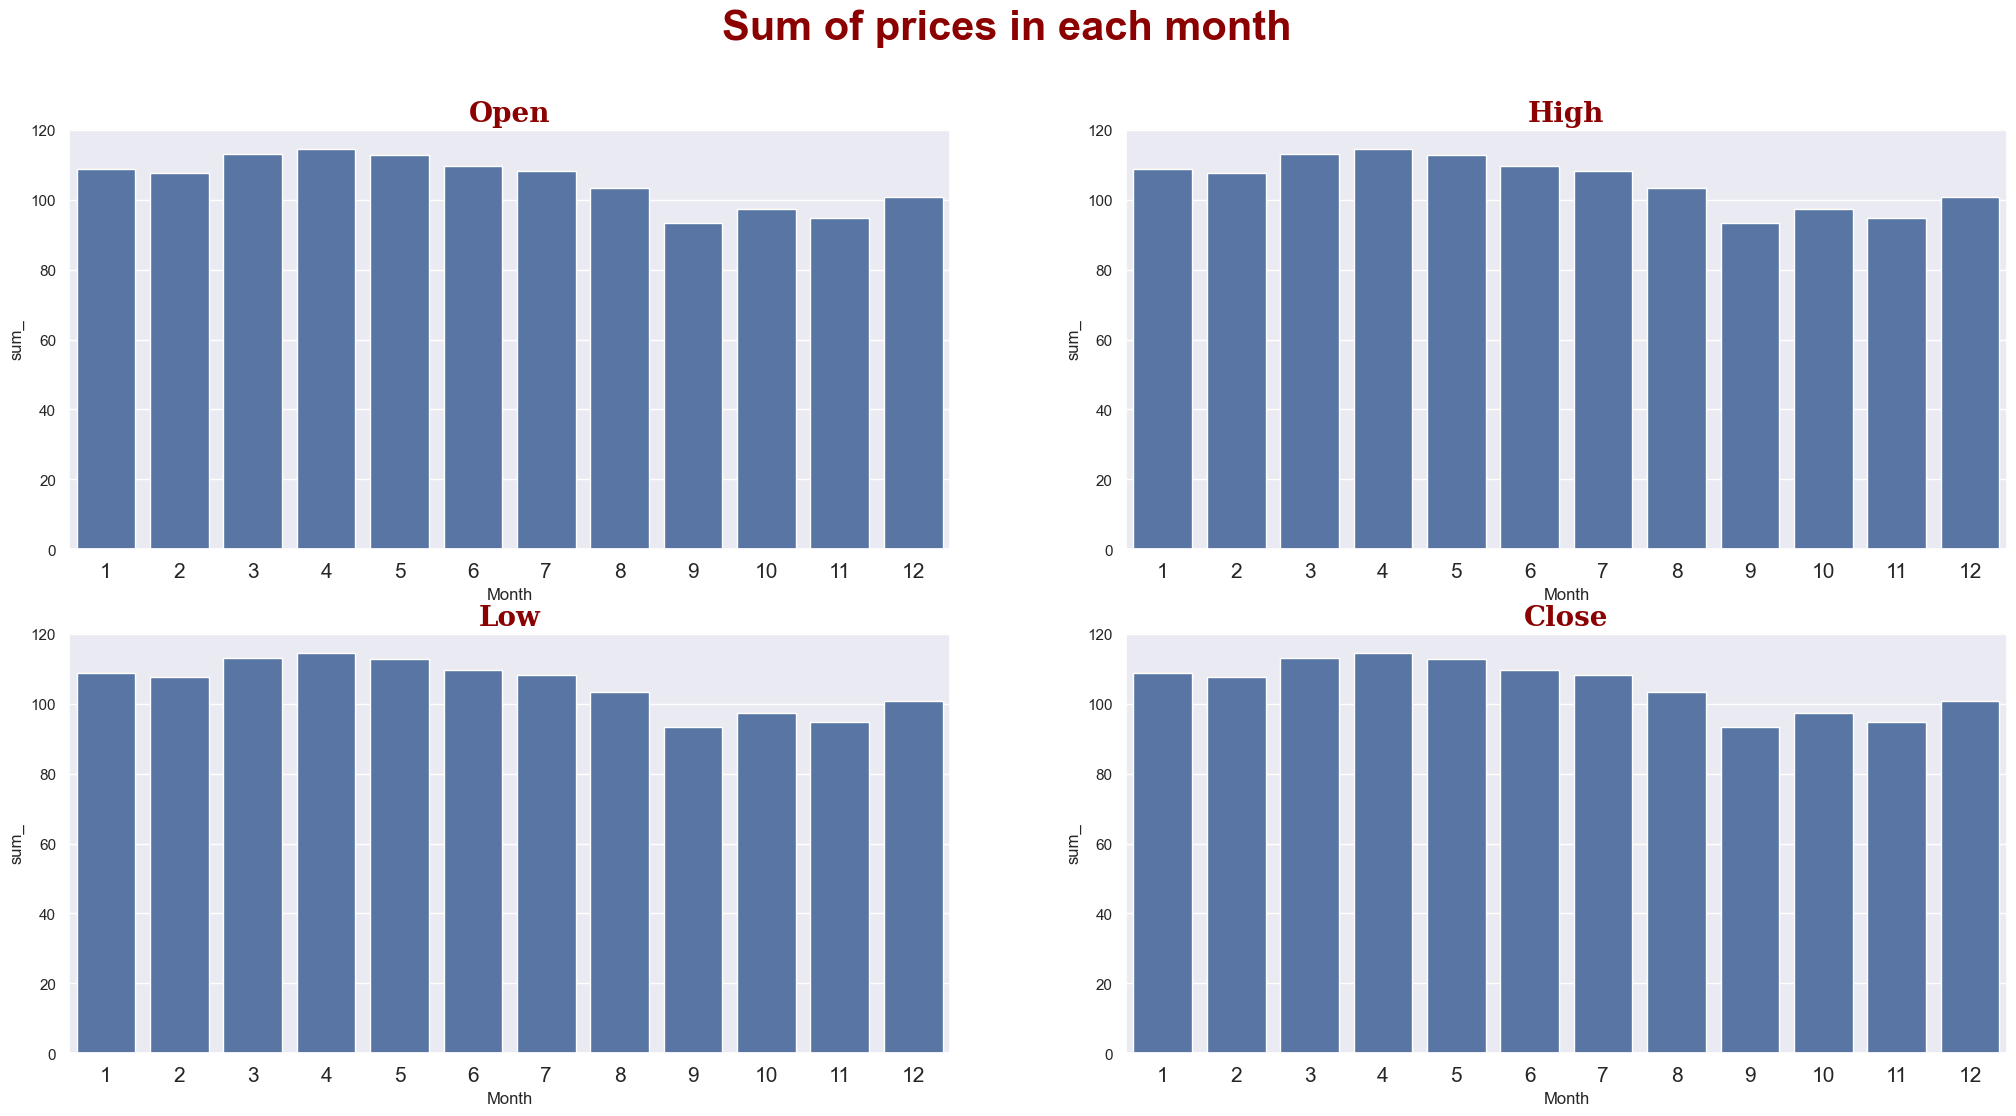

In [111]:
j = 1

for col in df.columns[1:5]:
    aux = df.groupby('Month')[x].mean().reset_index(name = 'sum_')
    aux['Month'] = aux.Month.apply(lambda x : month_order[x])
    aux.sort_values('Month', inplace = True)
    plt.subplot(220+j)
    sns.barplot(x = aux.Month, y = aux.sum_)
    plt.xticks(fontsize = 15)
    plt.title(col, fontdict= title_dict)
    j+=1

plt.suptitle("Sum of prices in each month",  fontsize = 30, weight = 'bold', Color = 'darkred')
plt.show()

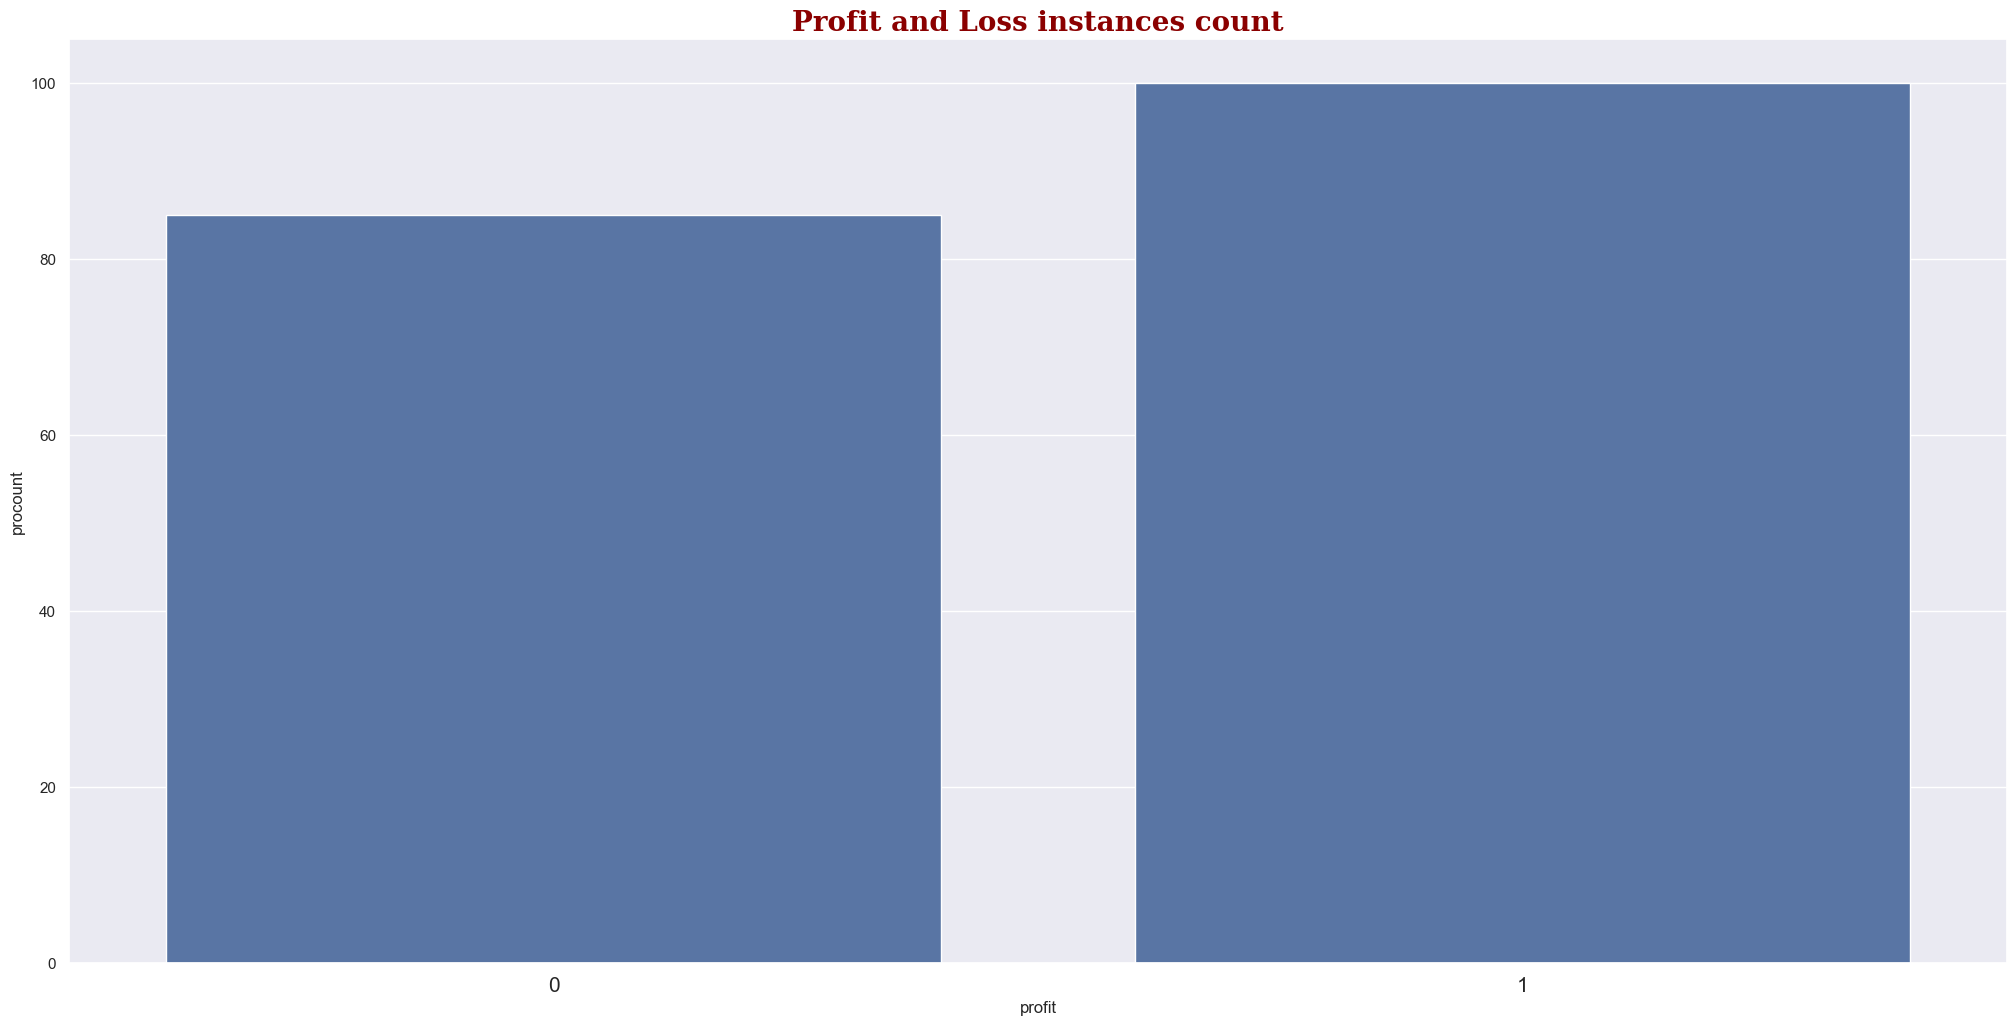

In [112]:
aux = df.groupby('profit').profit.count().reset_index(name = 'procount')
bar = sns.barplot(y = aux.procount, x = aux.profit)
plt.xticks(fontsize = 15)
plt.title("Profit and Loss instances count", fontdict= title_dict)
plt.show()
for label in bar.containers:
        bar.bar_label(label)

C:\Users\Varshil\AppData\Local\Temp\ipykernel_8608\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot:>

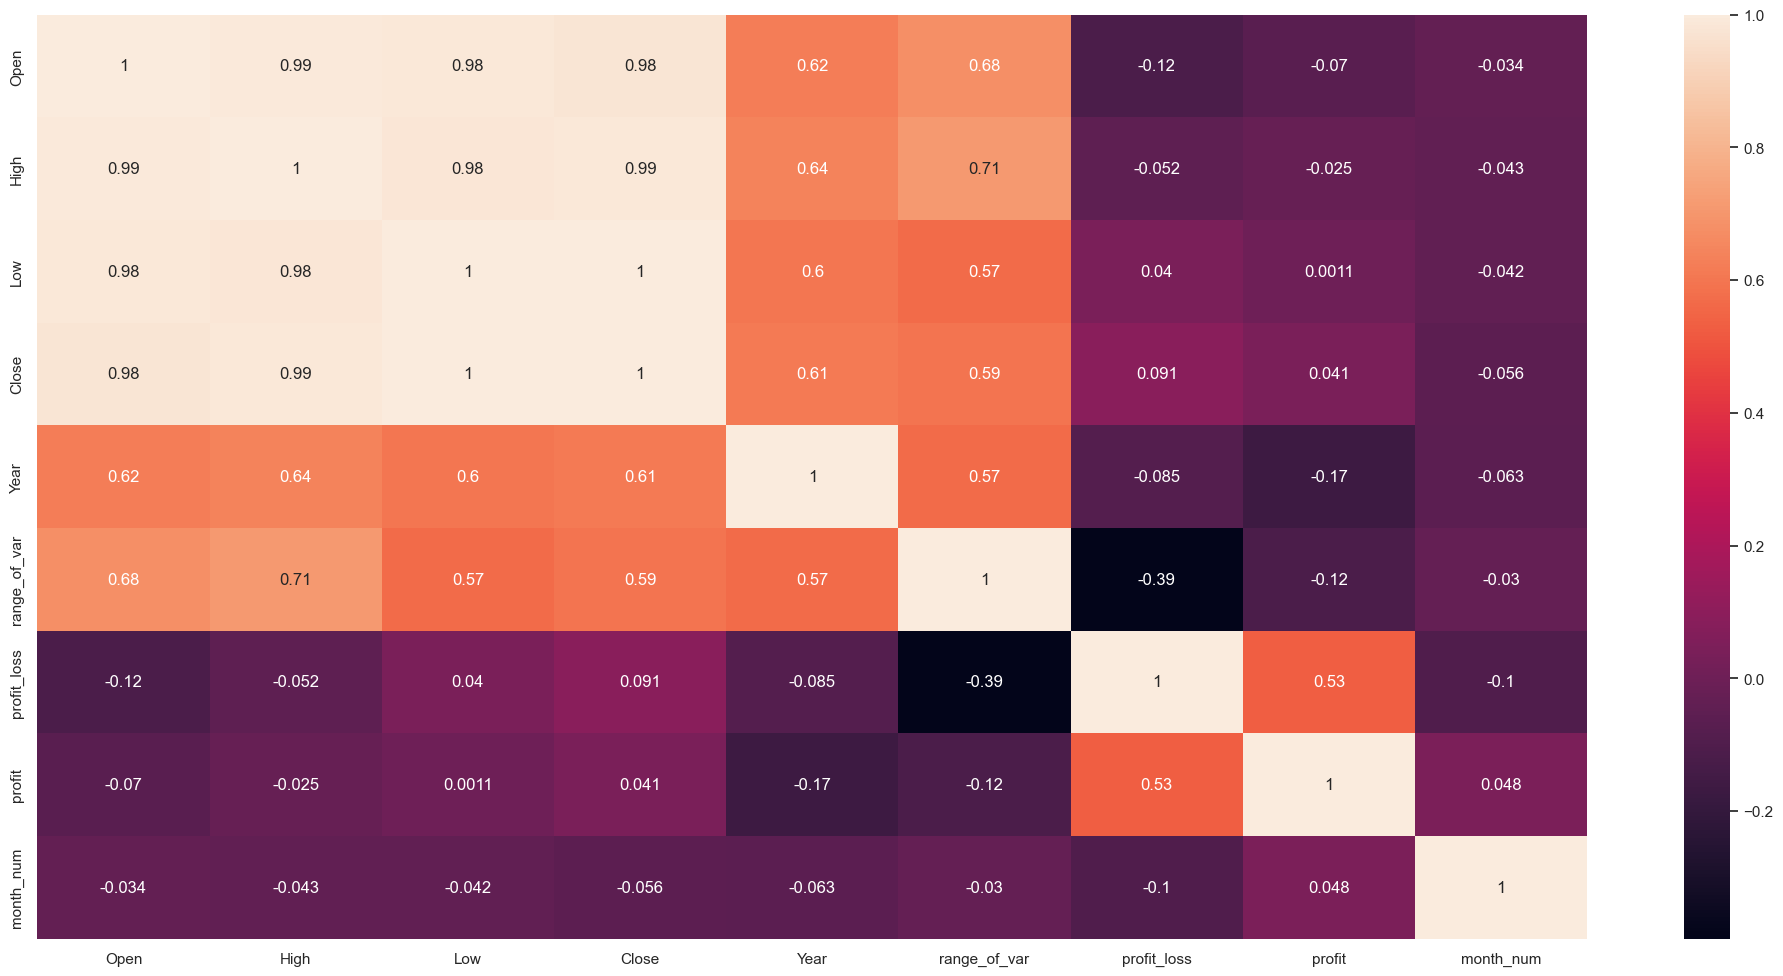

In [113]:
sns.heatmap(df.corr(), annot = True)

C:\Users\Varshil\AppData\Local\Temp\ipykernel_8608\647139848.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Outlier Detection",  fontsize = 30, weight = 'bold', Color = 'darkred')


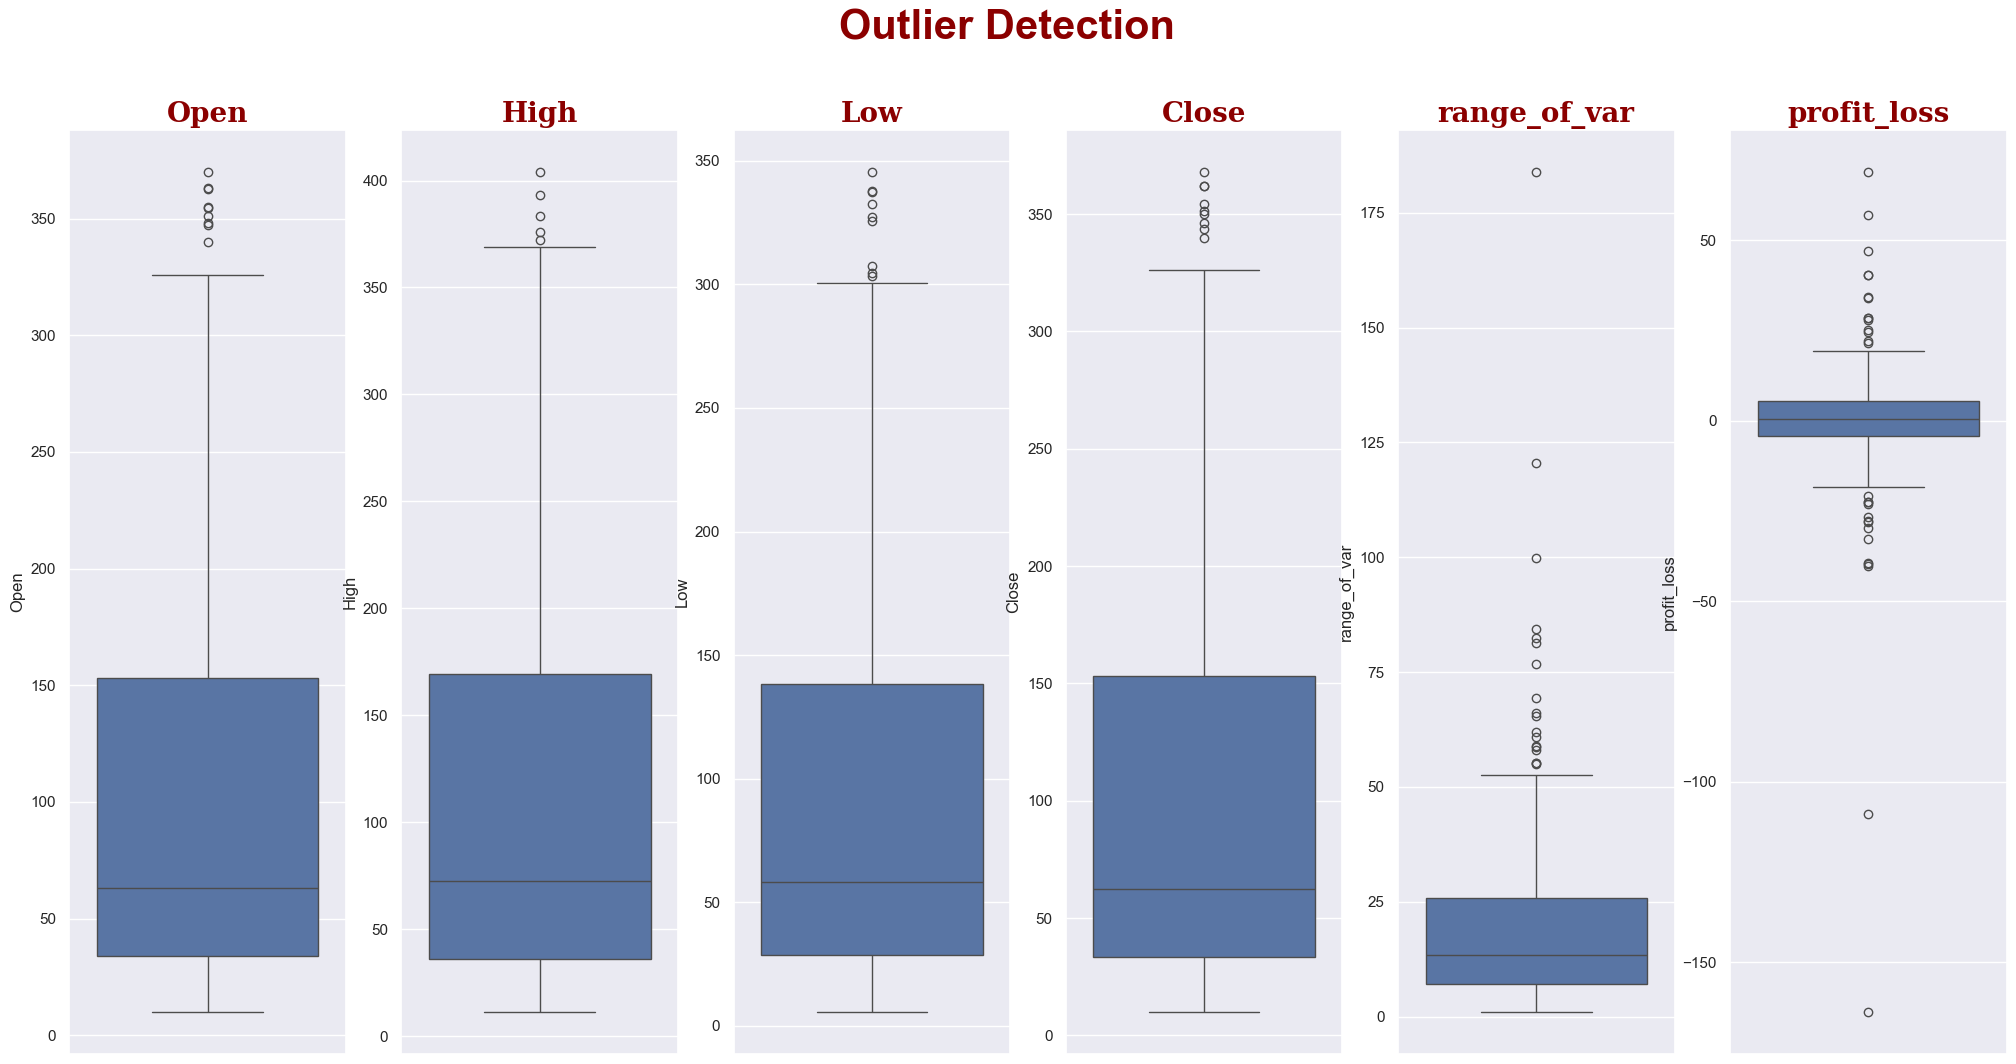

In [114]:
df_num = df.select_dtypes(['float'])
for i,x in enumerate(df_num.columns):
    plt.subplot(161+i)
    sns.boxplot(df[x])
    plt.title(x, fontdict=title_dict)
plt.suptitle("Outlier Detection",  fontsize = 30, weight = 'bold', Color = 'darkred')
plt.show()

##### Our main features [open, close, high, low] doesnt have many outliers and can be ignored. Other 2 features shows more outliers but those are important variations in data and can be ignored.

### **MACHINE LEARNING MODELS**

##### I will seperate 2019-20 data for the test and use the train data (2005-2018) to predict on 2019-20 using different Regression Models. I will be using LinearRegression, Lasso, Ridge, XGBoost, RandomForestReggression

In [115]:
df.head()

,Date,Open,High,Low,Close,Month,Year,range_of_var,profit_loss,profit,month_num
0,2005-07-01,13.0000,14.0000,11.2500,12.4600,Jul,2005,2.7500,-0.5400,0,7
1,2005-08-01,12.5800,14.8800,12.5500,13.4200,Aug,2005,2.3300,0.8400,1,8
2,2005-09-01,13.4800,14.8700,12.2700,13.3000,Sep,2005,2.6000,-0.1800,0,9
3,2005-10-01,13.2000,14.4700,12.4000,12.9900,Oct,2005,2.0700,-0.2100,0,10
4,2005-11-01,13.3500,13.8800,12.8800,13.4100,Nov,2005,1.0000,0.0600,1,11


In [116]:
X_train = df[df.Year < 2019]
y_train = X_train.Close
X_train.drop(['Date', 'Month', 'Close'], axis = 1, inplace = True)

X_test = df[df.Year > 2018]
y_test = X_test.Close
y_test_index = X_test.Date
X_test.drop(['Date', 'Month', 'Close'], axis = 1, inplace = True)


C:\Users\Varshil\AppData\Local\Temp\ipykernel_8608\419157600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['Date', 'Month', 'Close'], axis = 1, inplace = True)
C:\Users\Varshil\AppData\Local\Temp\ipykernel_8608\419157600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['Date', 'Month', 'Close'], axis = 1, inplace = True)


In [117]:
print(f"total features : {X_test.shape[1]}")
cols = " | ".join(X_test.columns)
print(f"Features to be taken : {cols}")
print(f"Training size : {X_train.shape[0]}")
print(f"Testing size : {X_test.shape[0]}")


total features : 8
Features to be taken : Open | High | Low | Year | range_of_var | profit_loss | profit | month_num
Training size : 162
Testing size : 23


In [118]:
def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y - yhat) / y)*100)

def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))

    return pd.DataFrame({"MAE": mae,
                         "MAPE": mape,
                         "RMSE": rmse}, index=[model_name])

In [119]:
# ML
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [120]:
##  model
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred_lr = lr.predict(X_test)

# perfomance
lr_result = ml_error("Linear Regression", y_test, y_pred_lr)
lr_result

,MAE,MAPE,RMSE
Linear Regression,0.0000,0.0000,0.0000


In [121]:
# model
lrr = Lasso(alpha=0.01)
lrr.fit(X_train, y_train)

# prediction
y_pred_lrr = lrr.predict(X_test)

# perfomance
lrr_result = ml_error("LR Lasso", y_test, y_pred_lrr)
lrr_result

,MAE,MAPE,RMSE
LR Lasso,0.0806,0.1512,0.1265


In [122]:
# model
lr_ridge = Ridge(alpha=0.01)
lr_ridge.fit(X_train, y_train)

# prediction
y_pred_lr_ridge = lr_ridge.predict(X_test)

# perfomance
lrr_result_ridge = ml_error("LR Ridge", y_test, y_pred_lr_ridge)
lrr_result_ridge

,MAE,MAPE,RMSE
LR Ridge,0.0000,0.0001,0.0001


In [123]:
# model
rf = RandomForestRegressor(
                            n_estimators=30,
                            random_state=42
                          )
rf.fit(X_train, y_train)

# prediction
y_pred_rf = rf.predict(X_test)

# performance
rf_result = ml_error("Random Forest Regressor", y_test, y_pred_rf)
rf_result

,MAE,MAPE,RMSE
Random Forest Regressor,10.4904,19.4752,15.4164


In [124]:
# model
xgbr = XGBRegressor(
                    n_estimators = 70,
                    eta = 0.4,
                    max_depth = 10,
                    subsample = 0.7,
                    )

xgbr.fit(X_train, y_train)

# prediction
y_pred_xgb = xgbr.predict(X_test)

# performance
xgb_result = ml_error("XGBoost Regressor", y_test, y_pred_xgb)
xgb_result

,MAE,MAPE,RMSE
XGBoost Regressor,8.4621,19.4156,12.9772


In [125]:
models = pd.concat([lr_result, lrr_result, lrr_result_ridge, rf_result, xgb_result])
models.sort_values(by = 'RMSE')

,MAE,MAPE,RMSE
Linear Regression,0.0000,0.0000,0.0000
LR Ridge,0.0000,0.0001,0.0001
LR Lasso,0.0806,0.1512,0.1265
XGBoost Regressor,8.4621,19.4156,12.9772
Random Forest Regressor,10.4904,19.4752,15.4164


#### Its really fascinating that linear regression is giving 0 error in this.
#### But we can also see that the data is purely numeric and most of the features are not categorical. Only month number and year are categorical features in data and also the test data is very small. That is why linear regression had clean predictions 

In [126]:

predictions = [pd.DataFrame(y_test.reset_index()), pd.Series(y_pred_lr), pd.Series(y_pred_lrr), 
                pd.Series(y_pred_lr_ridge), pd.Series(y_pred_rf), pd.Series(y_pred_xgb), 
                pd.DataFrame(y_test_index.reset_index())]

pred_df = pd.concat(predictions, axis = 1)

In [127]:
pred_df.columns = ['index', 'test', 'LR', 'LR_LASSO', 'LR_RIDGE', 'RFR', 'XGB', 'index2', 'date']
pred_df

,index,test,LR,LR_LASSO,LR_RIDGE,RFR,XGB,index2,date
0,162,194.3000,194.3000,194.6375,194.3001,208.2380,192.0669,162,2019-01-01
1,163,231.2000,231.2000,230.8622,231.1999,188.5537,195.9775,163,2019-02-01
2,164,275.0500,275.0500,274.9696,275.0500,270.2270,260.7421,164,2019-03-01
3,165,168.0000,168.0000,168.0841,168.0001,201.5137,185.0839,165,2019-04-01
4,166,147.9500,147.9500,147.9422,147.9500,158.7723,162.0737,166,2019-05-01
5,167,108.7000,108.7000,108.6662,108.7000,125.9127,116.9311,167,2019-06-01
6,168,91.3000,91.3000,91.2285,91.3000,94.8147,81.2385,168,2019-07-01
7,169,59.5000,59.5000,59.4717,59.5000,74.0247,55.1346,169,2019-08-01
8,170,41.4500,41.4500,41.5597,41.4500,56.6540,48.9684,170,2019-09-01
9,171,70.4500,70.4500,70.2675,70.4499,53.9043,66.8624,171,2019-10-01


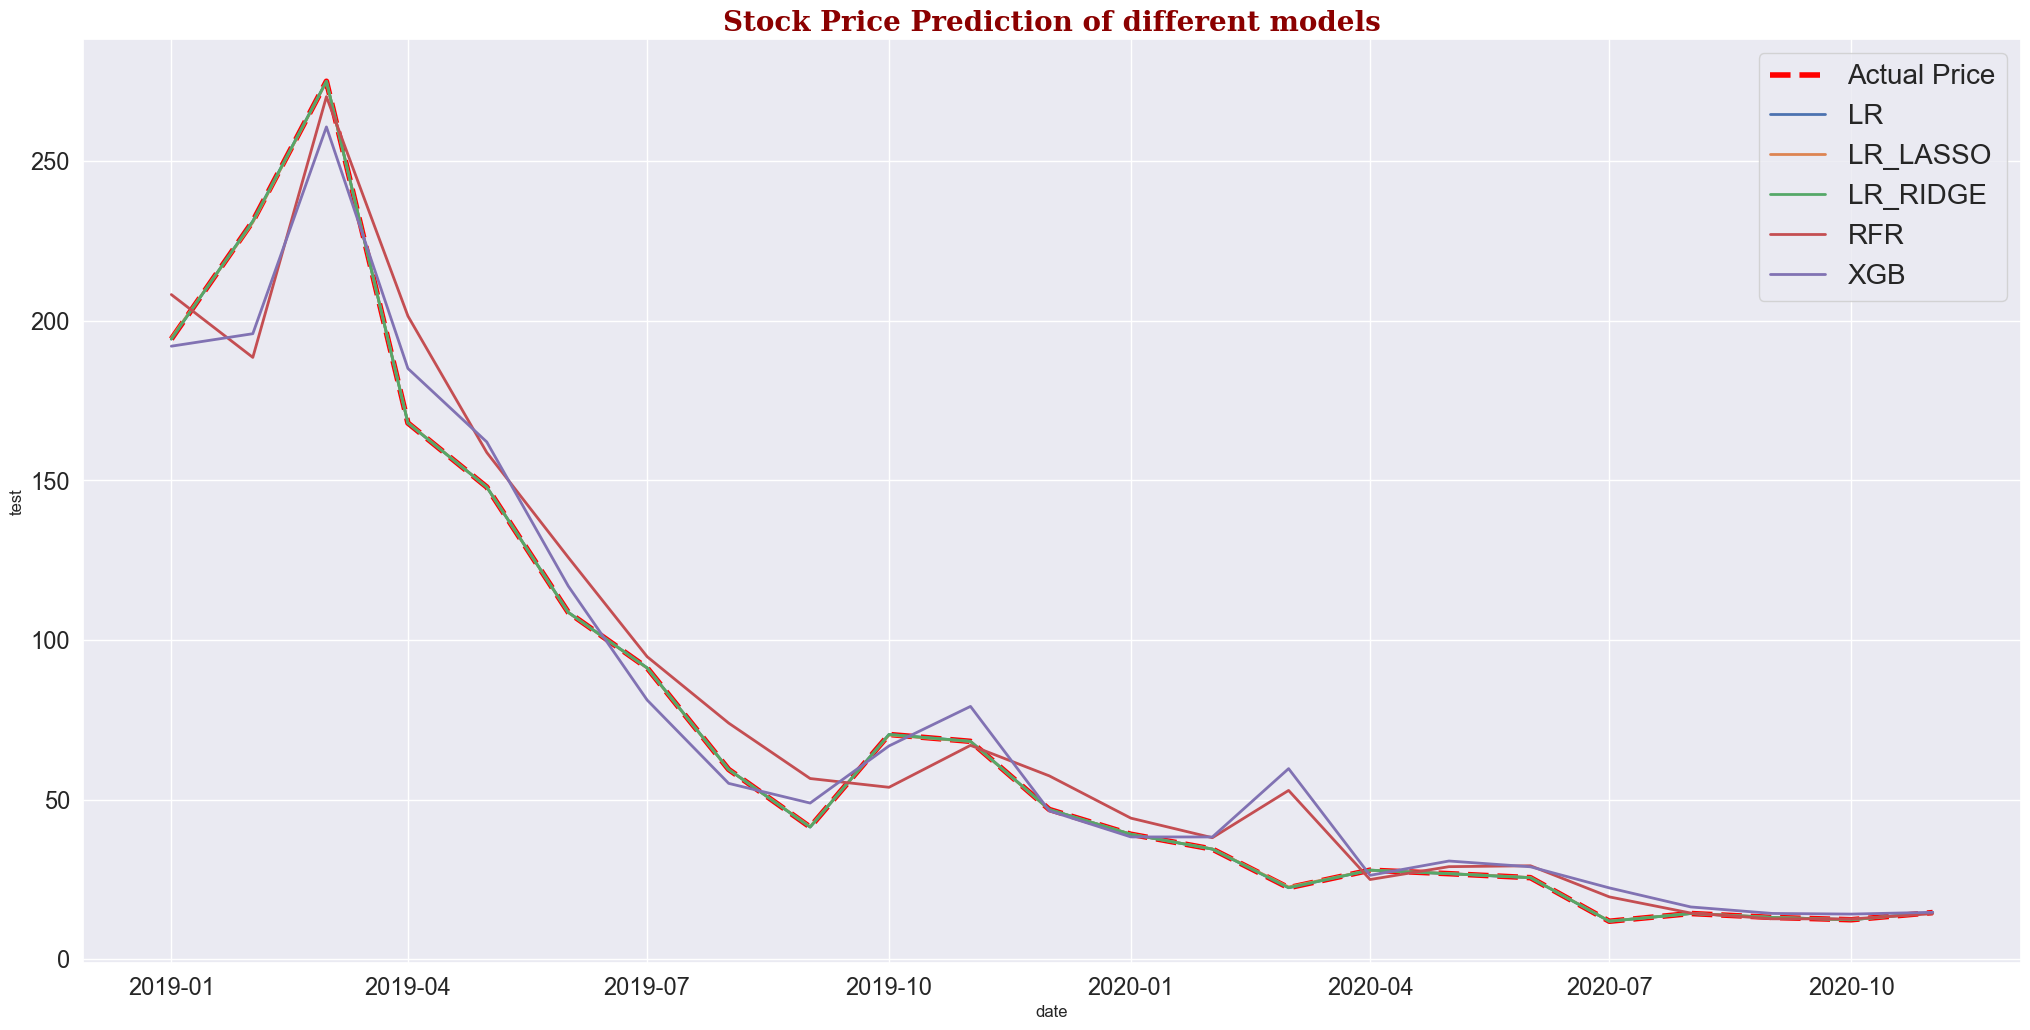

In [128]:
sns.lineplot(x = pred_df.date, y = pred_df['test'], color = 'red', linewidth = 4, linestyle='--')
for x in ['LR', 'LR_LASSO', 'LR_RIDGE', 'RFR', 'XGB']:
    sns.lineplot(x = pred_df.date, y = pred_df[x], linewidth = 2)
plt.legend(['Actual Price', 'LR', 'LR_LASSO', 'LR_RIDGE', 'RFR', 'XGB'], fontsize = 20)
plt.title('Stock Price Prediction of different models', fontdict=title_dict)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

#### from above graph we can see that for linear Regression, Lasso and Ridge predictions are very close to test data and are overlapped on each other. RandomForest and XGB can be seen varying around test data.

### **Conclusion**
#### YES BANK Stock Prices date consisting of 4 features can be easily used to predict the Closing Stock price using Linear Regression. 
